| 실습 | 뷰어 |
|:---:|:---:|
| [colab](https://colab.research.google.com/github/machinelearning-pangyo/Hands-On-MachineLearning/blob/master/04_training_linear_models.ipynb) | [nbviewer](http://nbviewer.jupyter.org/github/machinelearning-pangyo/Hands-On-MachineLearning/blob/master/04_training_linear_models.ipynb) |

In [0]:
# colab.research.google.com 사용 여부
USE_COLAB = True

In [0]:
if USE_COLAB:
    !pip freeze | grep -e numpy -e scipy -e scikit-learn -e pandas -e matplotlib
else:
    %load_ext watermark
    %watermark -v -p numpy,scipy,sklearn,pandas,matplotlib    

matplotlib==2.1.2
numpy==1.14.3
pandas==0.22.0
pandas-gbq==0.4.1
scikit-learn==0.19.1
scipy==0.19.1


**4장 – 모델 훈련**

_이 노트북은 4장에 있는 모든 샘플 코드와 연습문제 해답을 가지고 있습니다._

# 0.설정

파이썬 2와 3을 모두 지원합니다. 공통 모듈을 임포트하고 맷플롯립 그림이 노트북 안에 포함되도록 설정하고 생성한 그림을 저장하기 위한 함수를 준비합니다:

In [0]:
# 파이썬 2와 파이썬 3 지원
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
if not USE_COLAB:
    matplotlib.rc('font', family='NanumBarunGothic')
    plt.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 폴드
if not USE_COLAB:
    PROJECT_ROOT_DIR = "."
    CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    if USE_COLAB:
        pass
    else:
        path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
        if tight_layout:
            plt.tight_layout()
        plt.savefig(path, format='png', dpi=300)

# 1.선형회귀

1장에서 본 삶의 만족도 선형 회귀 모델:

$$
\text{삶의 만족도} = \theta_0 + \theta_1 \times \text{1인당_GDP}
$$

보다 일반적인 선형 모델:

$$
\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n
$$

* $\hat{y}$는 예측값
* $n$은 특성 개수
* $x_i$는 $i$번째 특성 값
* $\theta_j$는 $j$번째 모델 파라미터
* $\theta_0$ 는 **bias**

벡터 형태로 바꾸면:

$$
\hat{y} = h_{\boldsymbol{\theta}}(\mathbf{x}) = \boldsymbol{\theta}^T \cdot \mathbf{x}
$$

* $\theta$는 $\theta_0$(bias)와 $\theta_1$ 부터 $\theta_n$까지 특성을 담는 파라미터 벡터
* $\theta^T$ (행벡터)는 $\theta$ (열벡터)의 전치
* $\mathbf{x}$는 $x_0$에서 $x_n$까지 샘플의 특성 벡터, $x_0=1$
* $\theta^T \cdot \mathbf{x}$는 $\theta^T$와 $\mathbf{x}$의 점곱
* $h_\theta$는 모델 파라미터 $\theta$를 사용한 hypothesis 함수

선형 회귀 모델의 MSE 비용 함수:

$$
\text{MSE}(\mathbf{X}, h_{\boldsymbol{\theta}}) = \text{MSE}(\boldsymbol{\theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{(\boldsymbol{\theta}^T  \mathbf{x}^{(i)} - y^{(i)})^2}
$$



## 1-1. 정규방정식

$$
\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \cdot \mathbf{X})^{-1} \cdot \mathbf{X}^T \cdot \mathbf{y}
$$

* $\hat{\theta}$은 비용 함수를 최소화하는 $\theta$ 값
* $\mathbf{y}$는 $y^{(1)}$부터 $y^{(m)}$까지 포함하는 target 벡터
* [정규방정식 증명 1](https://goo.gl/Lf8VHJ)
* [정규방정식 증명 2](https://ayearofai.com/rohan-3-deriving-the-normal-equation-using-matrix-calculus-1a1b16f65dda)

예제 데이터 생성

$$
y = 4 + 3x_1 +\text{gaussian_noise}
$$

In [0]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

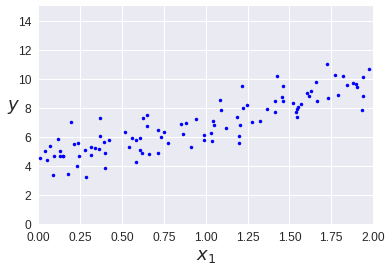

In [0]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [0]:
X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [0]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [0]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

In [0]:
y_real = 4 + X_new*3
y_real

array([[ 4],
       [10]])

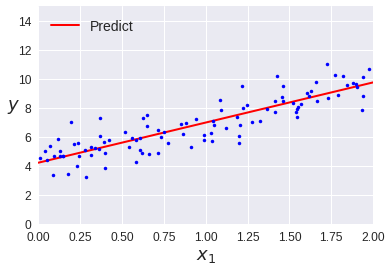

In [0]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predict")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions")
plt.show()

[`sklearn.linear_model.LinearRegression()`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [0]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [0]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

`LinearRegression` 클래스는 [`scipy.linalg.lstsq()`](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.linalg.lstsq.html) 함수("least squares"의 약자)를 사용하므로 직접 호출할 수 있습니다:

In [0]:
from scipy.linalg import lstsq
theta_best_svd, residuals, rank, s = lstsq(X_b, y, cond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

[`np.linalg.lstsq()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html)를 사용해도 됩니다:

In [0]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

이 함수는 $\mathbf{X}^+\mathbf{y}$을 계산합니다. $\mathbf{X}^{+}$는 $\mathbf{X}$의 [_유사역행렬_(pseudoinverse)](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse)입니다(Moore–Penrose 유사역행렬입니다). [`scipy.linalg.pinv()`](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.linalg.pinv.html)을 사용해서 유사역행렬을 직접 계산할 수 있습니다:

In [0]:
from scipy.linalg import pinv
pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

물론 이것도 [`np.linalg.pinv()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html) 로도 사용 가능합니다:

In [0]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

## 1-2.계산 복잡도

* 정규방정식은 $(n+1) \times (n+1)$ 크기를 가지는 계산을 하게 되므로 일반적으로 $O(n^{2.4})$ 에서 $O(n^3)$ 사이의 복잡도를 가짐 (np.linalg.lstsq 함수는 $O(n^2)$의 복잡도를 가짐)
* 샘플 개수에는 선형적으로 증가, $O(m)$

# 2.경사 하강법

**Gradient Descent**

파라미터 벡터 $\theta$에 대해 비용 함수의 미분값(Gradient)을 최소화하기 위해 반복해서 파라미터를 조정해가는 방법



**Learning Rate**

각 단계를 뜻하는 스텝의 크기를 조절하며, 값이 너무 크면 발산할 가능성이 있고, 너무 작으면 수렴하기 위해 많은 시간이 걸림

![learning rate](https://rasbt.github.io/mlxtend/user_guide/general_concepts/gradient-optimization_files/ball.png)

**Global Minimum**

**Local Minimum**

![global minimum and local minimum](https://upload.wikimedia.org/wikipedia/commons/thumb/6/68/Extrema_example_original.svg/600px-Extrema_example_original.svg.png)

## 2-1.배치 경사 하강법

**Batch Gradient Descent**

매 경사 하강법 스텝에서 전체 훈련 세트 $\mathbf{X}$에 대해 계산, 따라서 매우 큰 훈련 세트에서는 매우 느리고, 특성 개수에 민감하지 않음

비용 함수의 편도함수:

$$
\dfrac{\partial}{\partial \theta_j} \text{MSE}(\boldsymbol{\theta}) = \dfrac{2}{m}\sum\limits_{i=1}^{m}(\boldsymbol{\theta}^T \mathbf{x}^{(i)} - y^{(i)})\, x_j^{(i)}
$$

비용 함수의 그래디언트 벡터:

$$
\nabla_{\boldsymbol{\theta}}\, \text{MSE}(\boldsymbol{\theta}) =
\begin{pmatrix}
 \frac{\partial}{\partial \theta_0} \text{MSE}(\boldsymbol{\theta}) \\
 \frac{\partial}{\partial \theta_1} \text{MSE}(\boldsymbol{\theta}) \\
 \vdots \\
 \frac{\partial}{\partial \theta_n} \text{MSE}(\boldsymbol{\theta})
\end{pmatrix}
 = \dfrac{2}{m} \mathbf{X}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})
$$

* $\mathbf{X}$: $m \times n$
* $\mathbf{\theta}$: $n \times 1$
* $\mathbf{y}$: $m \times 1$
* $\mathbf{X}^T$: $n \times m$
* $\nabla_{\boldsymbol{\theta}}\, \text{MSE}(\boldsymbol{\theta})$: $n \times 1$

경사 하강법의 스텝:

$$
\boldsymbol{\theta}^{(\text{다음 스텝})}\,\,\, = \boldsymbol{\theta} - \eta \nabla_{\boldsymbol{\theta}}\, \text{MSE}(\boldsymbol{\theta})
$$

* $\eta$: learning rate

In [0]:
eta = 0.1   # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)   # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [0]:
theta

array([[4.21509616],
       [2.77011339]])

In [0]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

In [0]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

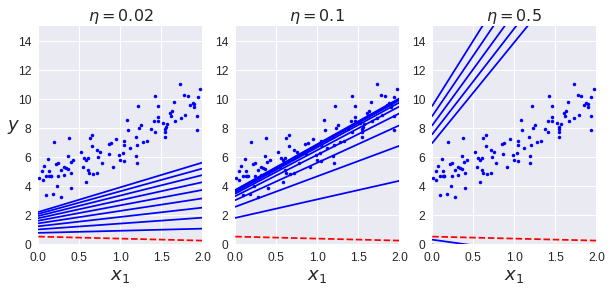

In [0]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

1. 왼쪽은 학습률이 너무 낮아서 최적점에 도달하는데 시간이 오래 걸림
2. 가운데는 학습률이 적당함
3. 오른쪽은 학습률이 너무 높아서 발산함

적절한 학습률을 찾기 위해 그리드 탐색을 사용하는데 학습률이 낮아 수렴하는데 너무 오래 걸리는 모델을 막기 위해 반복 회수를 제한해야 함.

## 2-2.확률적 경사 하강법

**Stochastic Gradient Descent**

* 매 스텝에서 딱 한개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그래디언트를 계산
* 매우 적은 데이터를 처리하므로 배치 경사 하강법에 비해 훨씬 빠르고, 하나의 샘플만 메모리에 있으면 되므로 매우 큰 훈련 세트도 훈련 시킬 수 있음
* 무작위로 샘플을 선택하므로 비용 함수가 위아래로 요동치면서 평균적으로 감소
* Local Minimum을 건너뛸 수 있지만 Global Minimum 주변을 맴돌게 됨
* 학습 스케쥴을 통해 위의 딜레마를 해결

** Learning Schedule**

학습을 시작할 때 학습률을 크게 하고 점차 작게 줄여서 최소값에 도달하게 하는 함수

In [0]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

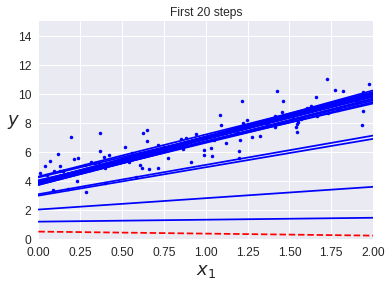

In [0]:
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터 learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # 책에는 빠짐
            y_predict = X_new_b.dot(theta)           # 책에는 빠짐
            style = "b-" if i > 0 else "r--"         # 책에는 빠짐
            plt.plot(X_new, y_predict, style)        # 책에는 빠짐
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # 책에는 빠짐

plt.plot(X, y, "b.")                                 # 책에는 빠짐
plt.xlabel("$x_1$", fontsize=18)                     # 책에는 빠짐
plt.ylabel("$y$", rotation=0, fontsize=18)           # 책에는 빠짐
plt.axis([0, 2, 0, 15])                              # 책에는 빠짐
plt.title("First 20 steps")
save_fig("sgd_plot")                                 # 책에는 빠짐
plt.show()                                           # 책에는 빠짐

In [0]:
theta

array([[4.21076011],
       [2.74856079]])

[`sklearn.linear_model.SGDRegressor()`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

[`numpy.ravel()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html)

In [0]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [0]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.16782089]), array([2.72603052]))

## 2-3.미니배치 경사 하강법

**Mini-batch Gradient Descent**

* 미니배치라 부르는 임의의 작음 샘플 세트에 대해 그래디언트를 계산
* GPU를 사용한 병렬 계산에 유리함
* 미니배치를 적당히 크게 하면 SGD보다 덜 불규칙하게 움직임

In [0]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 무작위 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [0]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [0]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

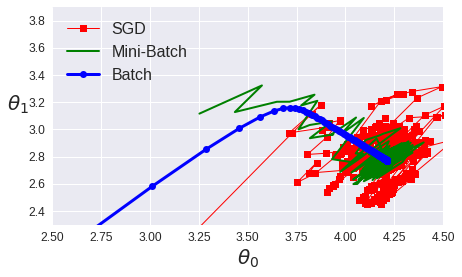

In [0]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="SGD")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-Batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

## 2-4.선형 회귀 알고리즘 비교

<table>
    <tr>
        <td> <b>알고리즘</b> </td>
        <td> <b>m 이 클 때</b> </td>
        <td> <b>외부 메모리 가능</b> </td>
        <td> <b>n 이 클 때</b> </td>
        <td> <b>하이퍼파라미터 수</b> </td>
        <td> <b>스케일 조정 필요</b> </td>
        <td> <b>Scikit-Learn</b> </td>
    </tr>
    <tr>
        <td>정규방정식</td>
        <td>빠름</td>
        <td>No</td>
        <td>느림</td>
        <td>0</td>
        <td>No</td>
        <td>LinearRegression</td>
    </tr>
    <tr>
        <td>배치 경사 하강법</td>
        <td>느림</td>
        <td>No</td>
        <td>빠름</td>
        <td>2</td>
        <td>Yes</td>
        <td>NA</td>
    </tr>
    <tr>
        <td>확률적 경사 하강법</td>
        <td>빠름</td>
        <td>Yes</td>
        <td>빠름</td>
        <td>$\geq$2</td>
        <td>Yes</td>
        <td>SGDRegressor</td>
    </tr>
    <tr>
        <td>미니배치 경사 하강법</td>
        <td>빠름</td>
        <td>Yes</td>
        <td>빠름</td>
        <td>$\geq$2</td>
        <td>Yes</td>
        <td>NA</td>
    </tr>
</table>

# 3.다항 회귀

**Polynomial Regression**

각 특성의 거듭제곱을 새로운 특성으로 추가하여 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 방법

예제 데이터 생성

$$
y = 0.5 x_1^{2} + x_1 + 2 +\text{gaussian_noise}
$$

In [0]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [0]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

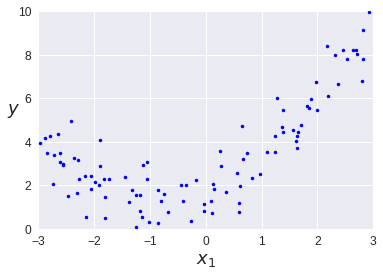

In [0]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

[`sklearn.preprocessing.PlynomialFeatures()`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [0]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [0]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [0]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

$$
\hat{y} = 0.56x_1^{2} + 0.93x_1 + 1.78
$$

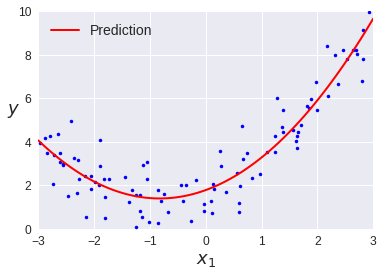

In [0]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Prediction")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

# 4.학습 곡선

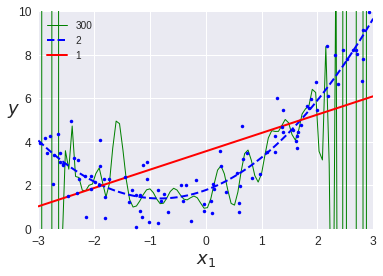

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Training")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation")
    plt.legend(loc="upper right", fontsize=14)   # 책에는 빠짐
    plt.xlabel("Size of Training Set", fontsize=14)       # 책에는 빠짐
    plt.ylabel("RMSE", fontsize=14)              # 책에는 빠짐

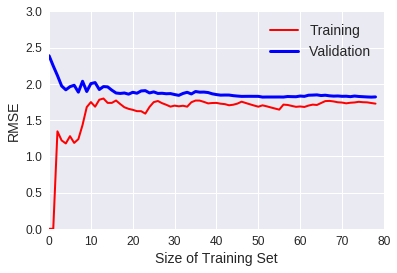

In [0]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # 책에는 빠짐
save_fig("underfitting_learning_curves_plot")   # 책에는 빠짐
plt.show()                                      # 책에는 빠짐

* 위 그래프는 Underfitting의 전형적인 모습이고, 훈련 샘플을 추가해도 효과가 없음

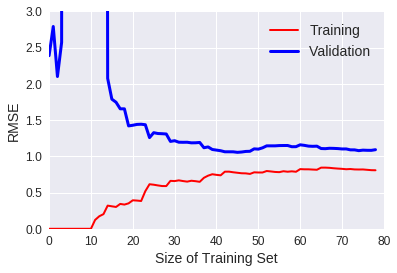

In [0]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # 책에는 빠짐
save_fig("learning_curves_plot")  # 책에는 빠짐
plt.show()                        # 책에는 빠짐

* 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 좋음
* 두 곡선 사이의 공간이 있는 것은 Overfitting을 의미, 훈련 샘플을 추가하면 곡선 사이가 가까워짐

**모델의 일반화 오차**

1. 편향
  * 잘못된 가정으로 발생
  * Underfitting 되기 쉬움
  
2. 분산
  * 훈련 데이터에 있는 작은 변동에 모델이 과도하게 민감하기 때문에 발생
  * 자유도가 높은 모델이 높은 분산을 가지기 쉬워 Overfitting 경향이 있음
  
3. 줄일 수 없는 오차
  * 데이터 자체에 있는 노이즈 때문에 발생
  * 데이터에서 노이즈를 제거하는 방법이 유일


* 모델의 복잡도가 커지면 <font color='red'>분산</font>이 늘어나고 <font color='blue'>편향</font>은 줄어듦
* 모델의 복잡도가 줄어들면 <font color='blue'>분산</font>은 작아지고 <font color='red'>편향</font>이 커짐

# 5.규제가 있는 선형 모델

## 5-1.릿지 회귀

**Ridge Regression**

* 규제항 $\alpha \sum_{i=1}^{n}\theta_{i}^{2}$이 비용 함수에 추가된 것
* 규제항은 훈련하는 동안에만 비용 함수에 추가 되고, 테스트 시엔 사용하지 않음
* $\alpha=0$이면 선형 회귀, $\alpha$가 아주 크면 모든 가중치가 거의 0에 가까워지고 데이터의 평균을 지나는 수평선이 됨

릿지 회귀 비용 함수:

$$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \dfrac{1}{2}\sum\limits_{i=1}^{n}\theta_i^2
$$

* $\theta_0$는 규제되지 않음
* $\mathbf{w}=[\theta_1, \theta_2, \dots , \theta_n]$라면, 규제항은 $\alpha\frac{1}{2}(\|\mathbf{w}\|_{2})^{2}$, 따라서 $J(\boldsymbol{\theta})=\text{MSE}(\boldsymbol{\theta}) + \alpha\mathbf{w}$
* [`sklearn.linear_model.Ridge()`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

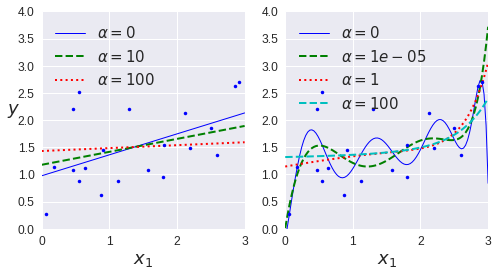

In [0]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:", "c--")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1, 100), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

릿지 회귀의 정규방정식

$$
\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X} + \alpha \mathbf{A})^{-1} \mathbf{X}^T \mathbf{y},
\quad
\mathbf{A} = \begin{bmatrix}
0 & 0 & \dots & 0 \\
a_{2,1} & a_{2,2} & \dots & a_{2,n+1} \\
\vdots & \vdots & \ddots & \vdots \\
a_{n+1,1} & a_{n+1,2} & \dots & a_{n+1,n+1}
\end{bmatrix}
$$

In [0]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [0]:
sgd_reg = SGDRegressor(max_iter=5, penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.13500145])

In [0]:
# sag: 확률적 평균 경사 하강법(Stochastic Average Gradient Descent)
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

## 5-2.라쏘 회귀

**Lasso Regression**

* __L__east __A__bsolute __S__hrinkage and __S__election __O__perator
* 규제항 $\alpha \sum_{i=1}^{n}\left|\theta_{i} \right|$이 비용 함수에 추가된 것
* 덜 중요한 특성의 가중치를 완전히 제거하려고 함, 희소 모델을 만듦

라쏘 회귀 비용 함수:

$$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right|
$$

라쏘 회귀 서브그래디언트 벡터:

$$
g(\boldsymbol{\theta}, J) = \nabla_{\boldsymbol{\theta}}\, \text{MSE}(\boldsymbol{\theta}) + \alpha
\begin{pmatrix}
  \operatorname{sign}(\theta_1) \\
  \operatorname{sign}(\theta_2) \\
  \vdots \\
  \operatorname{sign}(\theta_n) \\
\end{pmatrix},
\quad \text{여기서 } \operatorname{sign}(\theta_i) =
\begin{cases}
-1 & \theta_i < 0 \text{일 때 } \\
0 & \theta_i = 0 \text{일 때 } \\
+1 & \theta_i > 0 \text{일 때 }
\end{cases}
$$

* 라쏘의 비용 함수는 $\theta_i=0$일때 미분 불가능, 그래서 subgradient vector $\mathbf{g}$를 사용하면 경사 하강법 가능

* [`sklearn.linear_model.Lasso()`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

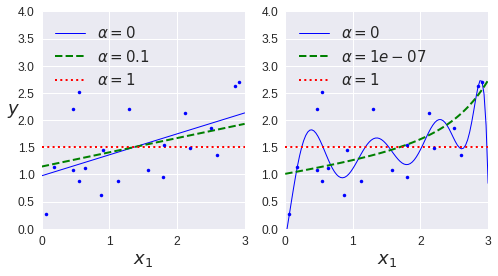

In [0]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)

save_fig("lasso_regression_plot")
plt.show()

In [0]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [0]:
lasso_reg = SGDRegressor(max_iter=5, penalty="l1", random_state=42)
lasso_reg.fit(X, y.ravel())
lasso_reg.predict([[1.5]])

array([1.13498188])

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [0]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

# 편향은 무시
t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[-1, 1], [-0.3, -1], [1, 0.1]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

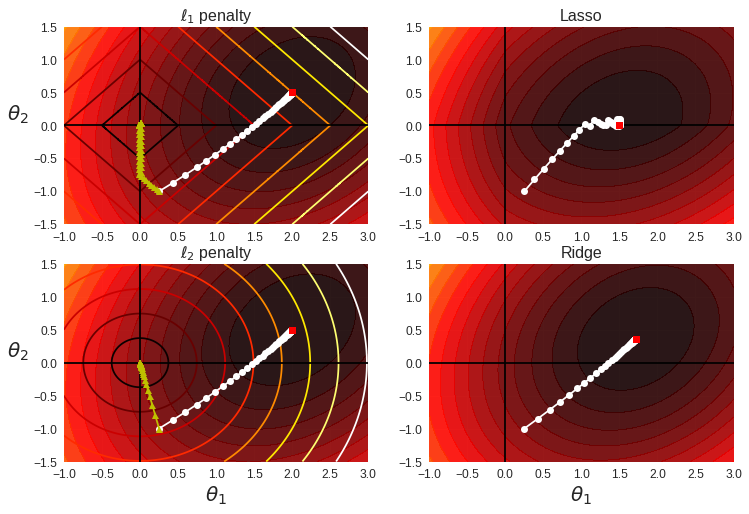

In [0]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.1, n_iterations = 50):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + 2 * l2 * theta

        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

plt.figure(figsize=(12, 8))
for i, N, l1, l2, title in ((0, N1, 0.5, 0, "Lasso"), (1, N2, 0,  0.1, "Ridge")):
    JR = J + l1 * N1 + l2 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(t_init, Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    plt.subplot(221 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, J, levels=levelsJ, alpha=0.9, cmap='hot')
    plt.contour(t1, t2, N, levels=levelsN, cmap='hot')
    plt.plot(path_J[:, 0], path_J[:, 1], "w-o")
    plt.plot(path_N[:, 0], path_N[:, 1], "y-^")
    plt.plot(t1_min, t2_min, "rs")
    plt.title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    plt.ylabel(r"$\theta_2$", fontsize=20, rotation=0, labelpad=15)
    if i == 1: plt.xlabel(r"$\theta_1$", fontsize=20)

    plt.subplot(222 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9, cmap='hot')
    plt.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    plt.plot(t1r_min, t2r_min, "rs")
    plt.title(title, fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    if i == 1: plt.xlabel(r"$\theta_1$", fontsize=20)

save_fig("lasso_vs_ridge_plot")
plt.show()

* 총 6개의 그래프: 노란색 삼각형 2개, 흰색 원 4개
* 노란색 삼각형
  * 위 코드 23번째 줄을 보면 `core=0`이므로 $\mathbf{MSE}$가 아닌 $\theta_1$, $\theta_2$가 원점으로 향하는 것 (규제들의 GD)
  * 왼쪽 상단의 경우 $\ell_1$ 규제이므로 마름모꼴 등고선, $\theta_1$이 0이 되도록 우선 움직인 후 $\theta_2$가 0이 되는 방향으로 움직임
  * 왼쪽 하단의 경우 $\ell_2$ 규제이므로 타원형 등고선
* 빨간 네모: global minimum
* 흰색 원
  * 비용 함수에 대한 배치 경사 하강법 경로
  * 우측 상단의 경우 라쏘 비용 함수에서 지그재그로 움직이는 것은 $\theta_2$에서 갑자기 기울기 바뀌기 때문
  * $\ell_2$ 규제가 있는 경우(우측 하단)가 규제가 없는 경우(좌측 하단)보다 $\theta=0$에 가까움


## 5-3.엘라스틱넷

**Elastic Net**

* 릿지 회귀와 라쏘 회귀를 절충한 모델
* 혼합 비율 $r$을 사용해 조절, `r=0`이면 릿지 회귀,  `r=1`이면 라쏘 회귀

엘라스틱넷 비용함수

$$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + r \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right| + \dfrac{1 - r}{2} \alpha \sum\limits_{i=1}^{n}{\theta_i^2}
, \quad 0 \leq r \leq 1
$$



**언제 사용해야 할까**
* __릿지__가 기본이 되지만 실제 쓰이는 특성이 몇 개뿐이면 __라쏘__나 __엘라스틱넷__
* 특성 수가 훈련 샘플 수보다 많거나 특성 몇개가 강하게 연관되어 있다면 __엘라스틱넷__

[sklearn.linear_model.ElasticNet()](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

* SciKit-Learn의 Lasso 클래스는 ElasticNet의 `l1_ratio=1.0`옵션 줌. 그렇지만 `l1_ratio=0`과 Ridge 클래스는 서로 다름

In [0]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## 5-4.조기 종료

**Early Stopping**

* 검증 에러가 최소값에 도달하면 바로 훈련을 중지
* 검증 에러가 증가하기 시작하면 overfitting의 시작을 의미
* 검증 에러가 일정 시간 동안 최소값보다 크다는 확신이 들 때 학습을 멈추고 최소였을 때의 모델 파라미터로 되돌림
* Beautiful free lunch, _Geoffrey Hinton_

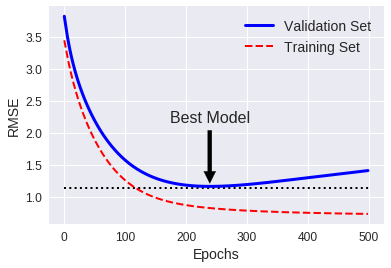

In [0]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,   # warm_start=True로 설정하면 fit()을 호출할때 처음부터가 아니라 이전 상황을 이어서 훈련
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best Model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation Set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training Set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
save_fig("early_stopping_plot")
plt.show()

In [0]:
from sklearn.base import clone
sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 이어서 학습합니다
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [0]:
best_epoch, best_model

(239, SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
        fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
        loss='squared_loss', max_iter=1, n_iter=None, penalty=None,
        power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
        warm_start=True))

# 6.로지스틱 회귀

**Logistic Regression**

* 샘플이 특정 클래스에 속할 확률을 추정하는 데 사용

##6-1. 확률 추정

* 선형 회귀처럼 값을 바로 출력하지 않고 __logistic__ 결과값을 출력

로지스틱 회귀 모델의 확률 추정:

$$
\hat{p} = h_{\boldsymbol{\theta}}(\mathbf{x}) = \sigma(\boldsymbol{\theta}^T \mathbf{x})
$$

로지스틱 함수([시그모이드 함수](https://en.wikipedia.org/wiki/Sigmoid_function)):

$$
\sigma(t) = \dfrac{1}{1 + \exp(-t)}
$$

로지스틱 회귀 모델 예측:

$$
\hat{y} =
\begin{cases}
  0 & \hat{p} < 0.5 \text{일 때 } \\
  1 & \hat{p} \geq 0.5 \text{일 때 } 
\end{cases}
$$

* 시그모이드 함수에서 $t < 0$ 이면 $\sigma(t) <0.5$ 이고, $t \geq 0$ 이면 $\sigma(t) \geq 0.5$ 이므로 로지스틱 회귀 모델은 $\quad\boldsymbol{\theta}^T \cdot\mathbf{x} < 0$ 일때 __0__, $\quad\boldsymbol{\theta}^T \cdot\mathbf{x} \geq 0$ 일때 __1__.

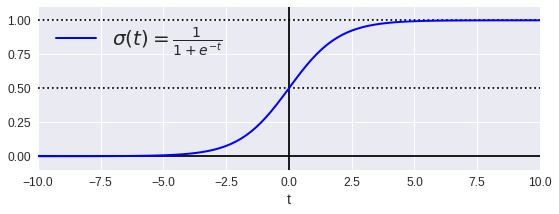

In [0]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
save_fig("logistic_function_plot")
plt.show()

## 6-2. 훈련과 비용 함수


* 훈련의 목적은 `y=1`에 대해서 높은 확률을 추정, `y=0`에 대해서 낮은 확률을 추정하는 모델의 파라미터 벡터 $\theta$를 찾는 것

하나의 훈련 샘플에 대한 비용 함수:

$$
c(\boldsymbol{\theta}) =
\begin{cases}
  -\log(\hat{p}) & y = 1 \text{일 때 } \\
  -\log(1 - \hat{p}) & y = 0 \text{일 때 }
\end{cases}
$$

로지스틱 회귀의 비용 함수:

$$
J(\boldsymbol{\theta}) = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]}
$$

* 로지스틱 회귀 비용 함수의 최소값을 계산하는 알려진 해가 없음
* convex  function이므로 gradient descent로 global minimum을 찾을 수 있음

로지스틱 비용 함수의 편도함수 ([유도과정](https://stats.stackexchange.com/questions/278771/how-is-the-cost-function-from-logistic-regression-derivated)):

$$
\dfrac{\partial}{\partial \theta_j} \text{J}(\boldsymbol{\theta}) = \dfrac{1}{m}\sum\limits_{i=1}^{m}\left(\mathbf{\sigma(\boldsymbol{\theta}}^T \mathbf{x}^{(i)}) - y^{(i)}\right)\, x_j^{(i)}
$$

## 6-3. 결정 경계



**사용하는 데이터셋**

* [Iris Dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set)
  * [Iris-Setosa](https://en.wikipedia.org/wiki/Iris_setosa)
  * [Iris-Versicolor](https://en.wikipedia.org/wiki/Iris_versicolor)
  * [Iris-Virginica](https://en.wikipedia.org/wiki/Iris_virginica)
* 꽃잎(petal), 꽃받침(sepal)의 너비와 길이

In [0]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [0]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [0]:
X = iris["data"][:, 3:]  # 꽃잎 넓이
y = (iris["target"] == 2).astype(np.int)  # Iris-Virginica이면 1 아니면 0

In [0]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

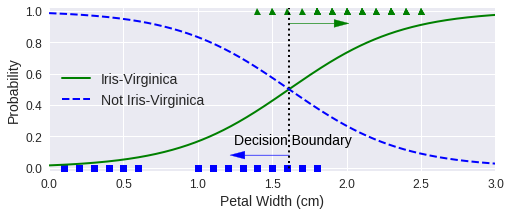

In [0]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision Boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal Width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()

In [0]:
decision_boundary

array([1.61561562])

In [0]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

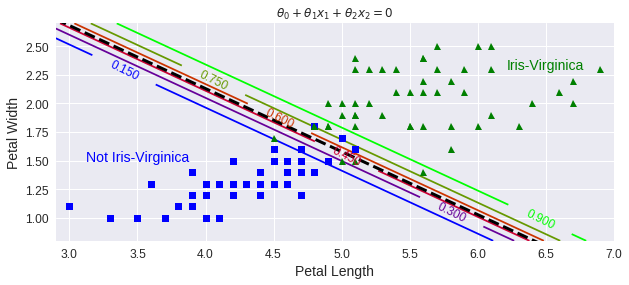

In [0]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

# 모델 규제 강도를 조절하는 하이퍼파라미터는 C(alpha의 역수), C가 높을 수록 규제가 줄어듦
log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal Length", fontsize=14)
plt.ylabel("Petal Width", fontsize=14)
plt.title(r"$\theta_0 + \theta_1x_1 + \theta_2x_2 = 0$")
plt.axis([2.9, 7, 0.8, 2.7])
save_fig("logistic_regression_contour_plot")
plt.show()

## 6-4. 소프트맥스 회귀

**Softmax Regression**

* 로지스틱 회귀 모델이 multi class를 수행할 수 있도록 일반화된 것
* 샘플 $\mathbf{x}$가 주어지면 각 클래스 $k$에 대한 점수 $S_K(\mathbf{x})$를 계산, 그 점수에 __*softmax function*__ 을 적용하여 각 클래스의 확률을 추정
* 한 번에 하나의 클래스만 예측, 상호 배타적인 클래스에서만 사용해야함

클래스 $k$에 대한 소프트맥스 점수:

$$
s_k(\mathbf{x}) = ({\boldsymbol{\theta}^{(k)}})^T \mathbf{x}
$$

소프트맥스 함수:

$$
\hat{p}_k = \sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}
$$

* $K$: 클래스 수
* $\mathbf{s}(\mathbf{x})$: 샘플 $\mathbf{x}$에 대한 각 클래스 점수 벡터
* $\sigma(\mathbf{s}(\mathbf{x}))_k$: 샘플 $\mathbf{x}$에 대한 각 클래스 점수가 주어졌을 때 클래스 $k$에 속할 추정 확률

소프트맥스 회귀 분류기의 예측:

$$
\hat{y} = \underset{k}{\operatorname{argmax}} \, \sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \underset{k}{\operatorname{argmax}} \, s_k(\mathbf{x}) = \underset{k}{\operatorname{argmax}} \, \left( ({\boldsymbol{\theta}^{(k)}})^T \mathbf{x} \right)
$$

**Cross Entropy**

모델이 target 클래스에 대해서 높은 확률을 추정하도록 만들기 위해 비용함수를 최소화하는 전략

크로스 엔트로피 비용 함수:

$$
J(\boldsymbol{\Theta}) = - \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}
$$

* $i$번째 샘플에 대한 target 클래스가 $k$일 때 $y_k^{(i)}$가 1이고, 그 외에는 0

클래스 $k$에 대한 크로스 엔트로피의 그래디언트 벡터:

$$
\nabla_{\boldsymbol{\theta}^{(k)}} \, J(\boldsymbol{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}
$$

In [0]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 넓이
y = iris["target"]

# multi_class="mutinomial"
# solver="lbfgs" -> l1 규제를 적용하지 않음
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

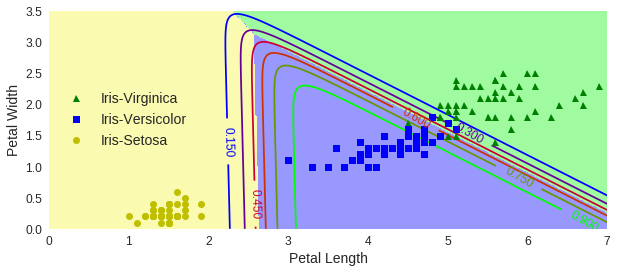

In [0]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal Length", fontsize=14)
plt.ylabel("Petal Width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
save_fig("softmax_regression_contour_plot")
plt.show()

In [0]:
# 꽃잎 길이 5cm, 너비 2cm
softmax_reg.predict([[5, 2]])

array([2])

In [0]:
# [Setosa, Versicolor, Virginica]
softmax_reg.predict_proba([[5, 2]])

array([[6.33134077e-07, 5.75276067e-02, 9.42471760e-01]])

In [0]:
# solver='saga' -> l1, l2 규제 적용
softmax_reg = LogisticRegression(multi_class="multinomial",solver="saga", C=10, random_state=42)
softmax_reg.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

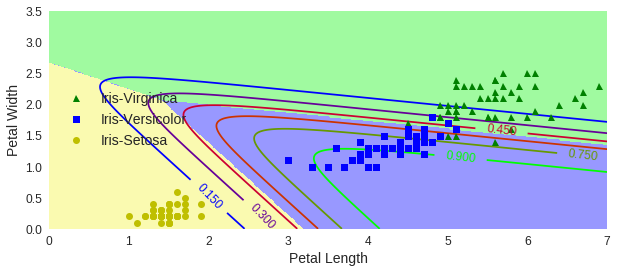

In [0]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal Length", fontsize=14)
plt.ylabel("Petal Width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
save_fig("softmax_regression_contour_plot")
plt.show()

In [0]:
# 꽃잎 길이 5cm, 너비 2cm
softmax_reg.predict([[5, 2]])

array([2])

In [0]:
# [Setosa, Versicolor, Virginica]
softmax_reg.predict_proba([[5, 2]])

array([[3.89648056e-05, 1.36811974e-01, 8.63149061e-01]])

# 7.연습문제 해답

## 7-12.조기 종료를 사용한 배치 경사 하강법으로 소프트맥스 회귀 구현하기
(사이킷런을 사용하지 않고)

먼저 데이터를 로드합니다. 앞서 사용했던 Iris 데이터셋을 재사용하겠습니다.

In [0]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 넓이
y = iris["target"]

모든 샘플에 편향을 추가합니다 ($x_0 = 1$):

In [0]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]

결과를 일정하게 유지하기 위해 랜덤 시드를 지정합니다:

In [0]:
np.random.seed(2042)

데이터셋을 훈련 세트, 검증 세트, 테스트 세트로 나누는 가장 쉬운 방법은 사이킷런의 `train_test_split()` 함수를 사용하는 것입니다. 이 연습문제의 목적은 직접 만들어 보면서 알고리즘을 이해하는 것이므로 가능한 한가지 방법은 다음과 같습니다:

In [0]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

타깃은 클래스 인덱스(0, 1 그리고 2)이지만 소프트맥스 회귀 모델을 훈련시키기 위해 필요한 것은 타깃 클래스의 확률입니다. 각 샘플에서 확률이 1인 타깃 클래스를 제외한 다른 클래스의 확률은 0입니다(다른 말로하면 주어진 샘플에 대한 클래스 확률이 원-핫 벡터입니다). 클래스 인덱스를 원-핫 벡터로 바꾸는 간단한 함수를 작성하겠습니다:

In [0]:
def to_one_hot(y, classes=3):
    # n_classes = y.max() + 1
    n_classes = classes
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

10개 샘플만 넣어 이 함수를 테스트해 보죠:

In [0]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [0]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

잘 되네요, 이제 훈련 세트와 테스트 세트의 타깃 클래스 확률을 담은 행렬을 만들겠습니다:

In [0]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

이제 소프트맥스 함수를 만듭니다. 다음 공식을 참고하세요:

$$
\hat{p}_k=\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}
$$

In [0]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

훈련을 위한 준비를 거의 마쳤습니다. 입력과 출력의 개수를 정의합니다:

In [0]:
n_inputs = X_train.shape[1] # == 3 (특성 2와 편향)
n_outputs = len(np.unique(y_train))   # == 3 (3개의 붓꽃 클래스)

이제 좀 복잡한 훈련 파트입니다! 이론적으로는 간단합니다. 그냥 수학 공식을 파이썬 코드로 바꾸기만 하면 됩니다. 하지만 실제로는 꽤 까다로운 면이 있습니다. 특히, 항과 인덱스가 뒤섞이기 쉽습니다. 제대로 작동할 것처럼 코드를 작성했더라도 실제 제대로 계산하지 못합니다. 확실하지 않을 때는 각 항의 크기를 기록하고 이에 상응하는 코드가 같은 크기를 만드는지 확인합니다. 각 항을 독립적으로 평가해서 출력해 보는 것도 좋습니다. 사실 사이킷런에 이미 잘 구현되어 있기 때문에 이렇게 할 필요는 없습니다. 직접 만들어 보면 어떻게 작동하는지 이해하는데 도움이 됩니다.

구현할 공식은 비용함수입니다:

$$
J(\mathbf{\Theta}) =
- \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}
$$

그리고 그래디언트 공식입니다:

$$
\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}
$$

$\hat{p}_k^{(i)} = 0$이면 $\log\left(\hat{p}_k^{(i)}\right)$를 계산할 수 없습니다. `nan` 값을 피하기 위해 $\log\left(\hat{p}_k^{(i)}\right)$에 아주 작은 값 $\epsilon$을 추가하겠습니다.

In [0]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 5.446183864821945
500 0.8351003035768683
1000 0.6876961554414913
1500 0.6010299835452124
2000 0.5442782811959167
2500 0.5037262742244605
3000 0.4728357293908467
3500 0.4481872508179334
4000 0.4278347262806173
4500 0.4105891022823528
5000 0.39568032574889406


바로 이겁니다! 소프트맥스 모델을 훈련시켰습니다. 모델 파라미터를 확인해 보겠습니다:

In [0]:
Theta

array([[ 3.3172417 , -0.6476445 , -2.99855999],
       [-1.16505434,  0.11283387,  0.10251113],
       [-0.72087779, -0.083875  ,  1.48587045]])

검증 세트에 대한 예측과 정확도를 확인해 보겠습니다:

In [0]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

와우, 이 모델이 매우 잘 작동하는 것 같습니다. 연습을 위해서 $\ell_2$ 규제를 조금 추가해 보겠습니다. 다음 코드는 위와 거의 동일하지만 손실에 $\ell_2$ 페널티가 추가되었고 그래디언트에도 항이 추가되었습니다(`Theta`의 첫 번째 원소는 편향이므로 규제하지 않습니다). 학습률 `eta`도 증가시켜 보겠습니다.

In [0]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1 # 규제 하이퍼파라미터

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 6.629574947908294
500 0.5341631554372782
1000 0.5037712748637474
1500 0.4948056455575166
2000 0.4914081948411196
2500 0.4900085074445459
3000 0.4894074289613261
3500 0.4891431024691195
4000 0.4890251654906585
4500 0.48897205809605315
5000 0.4889480004791562


추가된 $\ell_2$ 페널티 때문에 이전보다 손실이 조금 커보이지만 더 잘 작동하는 모델이 되었을까요? 확인해 보죠:

In [0]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

와우, 완벽한 정확도네요! 운이 좋은 검증 세트일지 모르지만 잘 된 것은 맞습니다.

이제 조기 종료를 추가해 보죠. 이렇게 하려면 매 반복에서 검증 세트에 대한 손실을 계산해서 오차가 증가하기 시작할 때 멈춰야 합니다.

In [0]:
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # 규제 하이퍼파라미터
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 4.70940845273367
500 0.5740996073458013
1000 0.5436382813658034
1500 0.5356387684314269
2000 0.5332563789170386
2500 0.5326544271776569
2765 0.5326058224570446
2766 0.5326058230506046 early stopping!


In [0]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

그래도 완벽하고 더 빠릅니다.

이제 전체 데이터셋에 대한 모델의 예측을 그래프로 나타내 보겠습니다:

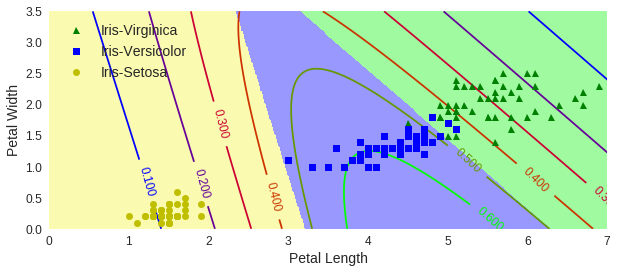

In [0]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal Length", fontsize=14)
plt.ylabel("Petal Width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

이제 테스트 세트에 대한 모델의 최종 정확도를 측정해 보겠습니다:

In [0]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333

완벽했던 최종 모델의 성능이 조금 떨어졌습니다. 이런 차이는 데이터셋이 작기 때문일 것입니다. 훈련 세트와 검증 세트, 테스트 세트를 어떻게 샘플링했는지에 따라 매우 다른 결과를 얻을 수 있습니다. 몇 번 랜덤 시드를 바꾸고 이 코드를 다시 실행해 보면 결과가 달라지는 것을 확인할 수 있습니다.

In [0]:
def autorun(seed=[2042], eta=[0.1], n_iter=[5001], alpha=[0.1], epsilon=[1e-7]):
    params = []
    n_seed = len(seed)
    n_eta = len(eta)
    n_n_iter = len(n_iter)
    n_alpha = len(alpha)
    n_epsilon = len(epsilon)
    for s in seed:
        for e in eta:
            for i in n_iter:
                for a in alpha:
                    for ep in epsilon:
                        params.append([s, e, i, a, ep])
                        
    print("Total Combination: {}".format(n_seed*n_eta*n_n_iter*n_alpha*n_epsilon))
    best_test_acc = 0
    best_comb = None
    
    for seed_, eta_, n_iter_, alpha_, epsilon_ in params:
        np.random.seed(seed_)
        m = len(X_train)
        best_loss = np.infty

        Theta = np.random.randn(n_inputs, n_outputs)

        for iteration in range(n_iter_):
            logits = X_train.dot(Theta)
            Y_proba = softmax(logits)
            xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon_), axis=1))
            l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
            loss = xentropy_loss + alpha_ * l2_loss
            error = Y_proba - Y_train_one_hot
            gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha_ * Theta[1:]]
            Theta = Theta - eta_ * gradients

            logits = X_valid.dot(Theta)
            Y_proba = softmax(logits)
            xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon_), axis=1))
            l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
            loss = xentropy_loss + alpha_ * l2_loss
            if loss < best_loss:
                best_loss = loss
            else:
                break

        logits = X_valid.dot(Theta)
        Y_proba = softmax(logits)
        y_predict = np.argmax(Y_proba, axis=1)

        val_accuracy_score = np.mean(y_predict == y_valid)

        logits = X_test.dot(Theta)
        Y_proba = softmax(logits)
        y_predict = np.argmax(Y_proba, axis=1)

        test_accuracy_score = np.mean(y_predict == y_test)
        
        if test_accuracy_score > best_test_acc:
            best_test_acc = test_accuracy_score
            best_comb = [test_accuracy_score, val_accuracy_score, seed_, eta_, n_iter_, alpha_, epsilon_]
        
        print("seed: {}, eta: {}: iterations: {}, alpha: {}, epsilon: {}".format(seed_, eta_, n_iter_, alpha_, epsilon_))
        print("Validation Acc: {:5f}, Test Acc: {:5f} \n".format(val_accuracy_score, test_accuracy_score))
        
    print("Best: ", best_comb)

In [0]:
seeds = [42, 2018, 2042, 12345]
etas = [0.01, 0.05, 0.1, 0.2, 0.5]
iterations = [10001]
alphas = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
epsilons = [1e-7]

In [0]:
autorun(seeds, etas, iterations, alphas, epsilons)

Total Combination: 120
seed: 42, eta: 0.01: iterations: 10001, alpha: 0, epsilon: 1e-07
Validation Acc: 0.966667, Test Acc: 0.933333 

seed: 42, eta: 0.01: iterations: 10001, alpha: 0.1, epsilon: 1e-07
Validation Acc: 0.966667, Test Acc: 0.933333 

seed: 42, eta: 0.01: iterations: 10001, alpha: 0.2, epsilon: 1e-07
Validation Acc: 0.933333, Test Acc: 0.933333 

seed: 42, eta: 0.01: iterations: 10001, alpha: 0.3, epsilon: 1e-07
Validation Acc: 0.900000, Test Acc: 0.933333 

seed: 42, eta: 0.01: iterations: 10001, alpha: 0.4, epsilon: 1e-07
Validation Acc: 0.866667, Test Acc: 0.933333 

seed: 42, eta: 0.01: iterations: 10001, alpha: 0.5, epsilon: 1e-07
Validation Acc: 0.866667, Test Acc: 0.933333 

seed: 42, eta: 0.05: iterations: 10001, alpha: 0, epsilon: 1e-07
Validation Acc: 0.966667, Test Acc: 0.966667 

seed: 42, eta: 0.05: iterations: 10001, alpha: 0.1, epsilon: 1e-07
Validation Acc: 1.000000, Test Acc: 0.933333 

seed: 42, eta: 0.05: iterations: 10001, alpha: 0.2, epsilon: 1e-07
Va

seed: 2018, eta: 0.2: iterations: 10001, alpha: 0, epsilon: 1e-07
Validation Acc: 0.966667, Test Acc: 0.933333 

seed: 2018, eta: 0.2: iterations: 10001, alpha: 0.1, epsilon: 1e-07
Validation Acc: 1.000000, Test Acc: 0.933333 

seed: 2018, eta: 0.2: iterations: 10001, alpha: 0.2, epsilon: 1e-07
Validation Acc: 0.933333, Test Acc: 0.933333 

seed: 2018, eta: 0.2: iterations: 10001, alpha: 0.3, epsilon: 1e-07
Validation Acc: 0.900000, Test Acc: 0.933333 

seed: 2018, eta: 0.2: iterations: 10001, alpha: 0.4, epsilon: 1e-07
Validation Acc: 0.866667, Test Acc: 0.933333 

seed: 2018, eta: 0.2: iterations: 10001, alpha: 0.5, epsilon: 1e-07
Validation Acc: 0.866667, Test Acc: 0.933333 

seed: 2018, eta: 0.5: iterations: 10001, alpha: 0, epsilon: 1e-07
Validation Acc: 0.333333, Test Acc: 0.333333 

seed: 2018, eta: 0.5: iterations: 10001, alpha: 0.1, epsilon: 1e-07
Validation Acc: 0.333333, Test Acc: 0.333333 

seed: 2018, eta: 0.5: iterations: 10001, alpha: 0.2, epsilon: 1e-07
Validation Acc: 

seed: 12345, eta: 0.05: iterations: 10001, alpha: 0.2, epsilon: 1e-07
Validation Acc: 0.933333, Test Acc: 0.933333 

seed: 12345, eta: 0.05: iterations: 10001, alpha: 0.3, epsilon: 1e-07
Validation Acc: 0.900000, Test Acc: 0.933333 

seed: 12345, eta: 0.05: iterations: 10001, alpha: 0.4, epsilon: 1e-07
Validation Acc: 0.866667, Test Acc: 0.933333 

seed: 12345, eta: 0.05: iterations: 10001, alpha: 0.5, epsilon: 1e-07
Validation Acc: 0.866667, Test Acc: 0.933333 

seed: 12345, eta: 0.1: iterations: 10001, alpha: 0, epsilon: 1e-07
Validation Acc: 0.966667, Test Acc: 0.966667 

seed: 12345, eta: 0.1: iterations: 10001, alpha: 0.1, epsilon: 1e-07
Validation Acc: 1.000000, Test Acc: 0.933333 

seed: 12345, eta: 0.1: iterations: 10001, alpha: 0.2, epsilon: 1e-07
Validation Acc: 0.933333, Test Acc: 0.933333 

seed: 12345, eta: 0.1: iterations: 10001, alpha: 0.3, epsilon: 1e-07
Validation Acc: 0.900000, Test Acc: 0.933333 

seed: 12345, eta: 0.1: iterations: 10001, alpha: 0.4, epsilon: 1e-07
V